In [46]:
import control
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
from mycontrol import myfom as FOM
from mycontrol import mystepinfo as STEPINFO
SettlingTimeThreshold = 0.05

ModuleNotFoundError: No module named 'mycontrol'

# 1. SISTEMA EM MALHA FECHADA

## 1.1 RESPOSTA AO DEGARU
![Resposta ao Degrau](SCT2_bloco2/completo/ALL0000/F0000TEK.JPG)

## 1.2 TEMPO DE SUBIDA
![Tempo de Subida](SCT2_bloco2/completo/ALL0001/F0001TEK.JPG)

In [36]:
v0 = 1.00
print(f'v0 = {v0} v')
vinf = 1.50
print(f'vinf = {vinf} v')

deltav = vinf - v0
print(f'deltav = {deltav} v')

v10 = deltav * 0.1 + v0
v90 = deltav * 0.9 + v0
print(f'v10 = {v10} v')
print(f'v90 = {v90} v')

t10 = 6.80e-3
t90 = 21.6e-3
print(f't10 = {t10} s')
print(f't90 = {t90} s')
RiseTime = t90 - t10
print(f'RiseTime = {RiseTime} s')

v0 = 1.0 v
vinf = 1.5 v
deltav = 0.5 v
v10 = 1.05 v
v90 = 1.45 v
t10 = 0.0068 s
t90 = 0.0216 s
RiseTime = 0.0148 s


## 1.3 TEMPO DE ATRASO
![Tempo de Atraso](SCT2_bloco2/completo/ALL0002/F0002TEK.JPG)

In [37]:
deltav = vinf - v0
print(f'deltav = {deltav} v')

v50 = deltav * 0.5 + v0
print(f'v50 = {v50} v')
t50 = 13.6e-3
print(f'Delay = {t50} s')

deltav = 0.5 v
v50 = 1.25 v
Delay = 0.0136 s


## 1.4 PICO E TEMPO DE PICO
![Pico e Tempo de Pico](SCT2_bloco2/completo/ALL0003/F0003TEK.JPG)

In [49]:
PeakTime = 33.3e-3
print(f'PeakTime = {PeakTime} s')

PeakValue = 1.51
print(f'PeakValue = {PeakValue} v')

OverShoot = 100 * (PeakValue - vinf) / (vinf - v0)
print(f'OverShoot = {OverShoot} %')

PeakTime = 0.0333 s
PeakValue = 1.51 v
OverShoot = 2.0000000000000018 %


## 1.5 TEMPO DE ACOMODAÇÃO
![Tempo de Acomodação](SCT2_bloco2/completo/ALL0005/F0005TEK.JPG)

In [51]:
SettlingTimeThreshold = 0.05
sup_margin = (1. + SettlingTimeThreshold) * deltav +v0
inf_margin = (1. - SettlingTimeThreshold) * deltav +v0
print(f'sup_margin = {sup_margin} v')
print(f'inf_margin = {inf_margin} v')
SettlingTime = (23.8e-3 + 23.8e-3) / 2
print(f'SettlingTime = {SettlingTime} s')

sup_margin = 1.525 v
inf_margin = 1.475 v
SettlingTime = 0.0238 s


## 1.6 FUNÇÃO DE TRANSFERÊNCIA EQUIVALENTE

In [40]:
zeta = -np.log(OverShoot / 100.) / np.sqrt(  (-np.pi)**2 + (np.log(OverShoot / 100.))**2  )
wn = np.pi / (PeakTime * np.sqrt(1 - zeta**2) )
print(f'zeta = {zeta}')
print(f'wn = {wn}')
zeta_check = np.sqrt(1 - ((np.pi)/(wn * PeakTime))**2)
print(f'zeta_check = {zeta_check}')

zeta = 0.7797032674120721
wn = 150.21924645387776
zeta_check = 0.779703267412072



        2.257e+04
-------------------------
s^2 + 234.3 s + 2.257e+04



ValueError: Parameter ``T``: time values must be equally spaced.

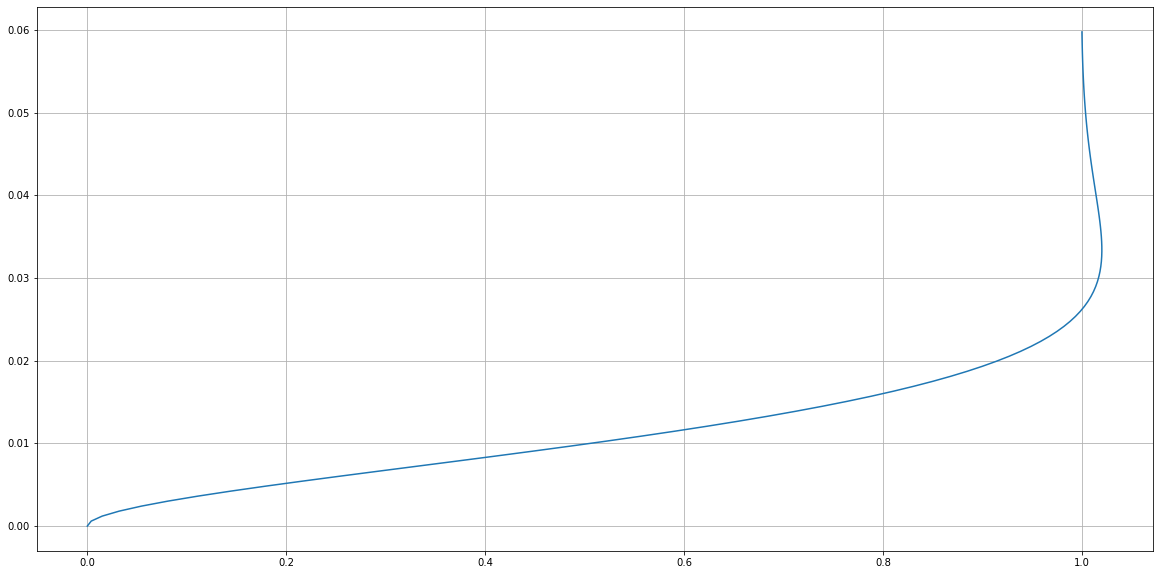

In [44]:
G2_s = control.tf([wn**2],[1, 2 * zeta * wn, wn**2])
print(G2_s)
plt.figure(figsize=(20,10))
step_out, t = control.step_response(G2_s)
plt.plot(t, step_out)
plt.grid()

S = control.step_info(G2_s, t, SettlingTimeThreshold=SettlingTimeThreshold)
fom = FOM(S, SettlingTimeThreshold)

print(json.dumps(S, indent=4))
print(json.dumps(fom, indent=4))

In [45]:
# Representação polar
Ts = 1/1000
p1_r = np.exp(-Ts * fom['zeta'] * fom['wn'])
p1_theta = np.degrees(Ts * fom['wd'])
print(f'Pólo P1 -> [{p1_r}, {p1_theta}°]')

# Representação retangular
p1 = p1_r * np.exp(1j * Ts * fom['wd'])
print(f'Pólo P1 -> {p1}')

polo_dominante_desejado = tf(1, np.poly([p1, p1.conjugate()]), Ts)
print(polo_dominante_desejado)
# plt.figure(figsize=(20,10))
# zplane(polo_dominante_desejado, color='blue')
# zplane(G_z)

NameError: name 'fom' is not defined